## Исследование данных о российском кинопрокате



### Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации. 
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку, ответить на вопрос, насколько такие фильмы интересны зрителю. 
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Данные: 
- mkrf_movies.csv — данные о прокатных удостоверениях. 
- mkrf_shows.csv — данные о прокате в российских кинотеатрах. 

### Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

##  Импорт библиотек и данных

In [1]:
import pandas as pd

pd.options.display.float_format = '{:,.1f}'.format
pd.options.mode.chained_assignment = None

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
shows = pd.read_csv('/datasets/mkrf_shows.csv')
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для объединения датафреймов по столбцу puNumber преобразуем значения в этом столбце в int.

In [3]:
movies[~movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В таблице movies в столбце puNumber есть значение "нет", заменим его на 0 для корректного преоброазования данных.

In [6]:
movies.loc[movies['puNumber'] == "нет", 'puNumber'] = 0

In [10]:
movies.puNumber = movies['puNumber'].astype('int32')
movies.puNumber.dtypes

dtype('int32')

In [11]:
df = movies.merge(shows, on='puNumber', how='left')

_Проверка._

In [12]:
df[df['box_office'].notna()]['box_office'].count()

3158

In [13]:
df.sample(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5132,Воды слонам! /По произведению Сары Груэн/,121006111,2011-04-14T12:00:00.000Z,Художественный,"3 Артс Интертейнмент, Крейзи Хорз Эффектс,Флэш...",США,Фрэнсис Лоуренс,"Джил Неттер, Эрвин Стофф, Эндрю Р.Теннербаум",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама",NaN
3980,"Я счастлив, что моя мать жива",221102510,2010-09-08T12:00:00.000Z,Художественный,"Эф Комм Филм, Орли Филмс, Франс 3 Синема, Пэйд...",Франция,"Клод Миллер, Натан Миллер","Жак Одиар, Жан-Луи Ливи, Ален Ваннье",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,драма,NaN
2671,Игра на выживание__,121009515,2015-04-27T12:00:00.000Z,Художественный,Фэзе Филмз,США,Жан-Батист Леонетти,"Майкл Дуглас, Роберт Митас, Филлип Элвей",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.6,"триллер,приключения","9,358,511.3"
2984,Маргарита,121008916,2016-04-19T12:00:00.000Z,Художественный,"Фиделите Фильм, Габриэль, Франс 3 Синема, Сире...",Франция - Чехия - Бельгия,Ксавье Джанноли,"Оливье Дельбоск, Марк Миссонье",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"драма,комедия,музыка","1,237,661.0"
5673,Селфи,111012117,2018-02-01T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,"20,000,000.0","40,000,000.0",0.0,Фонд кино,5.8,"триллер,драма","225,196,400.0"


## Предобработка данных

Переименуем столбец puNumber согласно snake_case.

In [14]:
df = df.rename(columns={'puNumber':'pu_number'})
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

### Изучим пропуски в датафрейме

In [15]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

- В столбцах с категориальными значениями пропуски заполнить сложно - для этого нужно искать в сторонних источниках информацию о фильме, что достоточно трудоемко.
- В столбцах с количественными значениями пропуски стоят там, где информация для фильма не предоставлена. Оставим как есть.

### Проверка типов данных

In [16]:
df.dtypes

title                     object
pu_number                  int32
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

- Преобразуем данные в столбце show_start_date в datetime. 

In [17]:
df.show_start_date = pd.to_datetime(df.show_start_date).dt.tz_localize(None).dt.normalize()
df.show_start_date.head()

0   2015-11-27
1   2016-09-13
2   2016-10-10
3   2016-06-10
4   2015-07-29
Name: show_start_date, dtype: datetime64[ns]

### Изучим дубликаты в датафрейме

In [18]:
for column in df.columns:
    print(f'Количество дубликатов в столбце {column} - {df[column].duplicated().sum()}')

Количество дубликатов в столбце title - 714
Количество дубликатов в столбце pu_number - 2
Количество дубликатов в столбце show_start_date - 5521
Количество дубликатов в столбце type - 7478
Количество дубликатов в столбце film_studio - 1995
Количество дубликатов в столбце production_country - 6535
Количество дубликатов в столбце director - 2674
Количество дубликатов в столбце producer - 2136
Количество дубликатов в столбце age_restriction - 7481
Количество дубликатов в столбце refundable_support - 7451
Количество дубликатов в столбце nonrefundable_support - 7410
Количество дубликатов в столбце budget - 7195
Количество дубликатов в столбце financing_source - 7482
Количество дубликатов в столбце ratings - 7391
Количество дубликатов в столбце genres - 6743
Количество дубликатов в столбце box_office - 4547


Так как у одного фильма может быть несколько прокатных удостоверений, то получилось 714 неявных дубликатов в столбце title. Удалим их.

In [19]:
df = df.drop_duplicates(subset='title').reset_index(drop=True)
len(df[df['title'].duplicated()])

0

In [20]:
for column in df.columns:
    print(f'Количество дубликатов в столбце {column} - {df[column].duplicated().sum()}')

Количество дубликатов в столбце title - 0
Количество дубликатов в столбце pu_number - 0
Количество дубликатов в столбце show_start_date - 4858
Количество дубликатов в столбце type - 6764
Количество дубликатов в столбце film_studio - 1325
Количество дубликатов в столбце production_country - 5828
Количество дубликатов в столбце director - 1985
Количество дубликатов в столбце producer - 1465
Количество дубликатов в столбце age_restriction - 6767
Количество дубликатов в столбце refundable_support - 6737
Количество дубликатов в столбце nonrefundable_support - 6696
Количество дубликатов в столбце budget - 6484
Количество дубликатов в столбце financing_source - 6768
Количество дубликатов в столбце ratings - 6677
Количество дубликатов в столбце genres - 6029
Количество дубликатов в столбце box_office - 3937


- Проверка на явные дубликаты.

In [21]:
df.duplicated().sum()

0

Явные дубликаты отсутсвуют.

### Анализ уникальных значений

#### Изучим категориальные значения

В датасете есть столбцы, где встречаются пробелы в начале или конце строковых значений. Удалим их.

In [23]:
for column in ['type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'genres']:
    df[column] = df[column].str.strip(' ')

В столбце production_country приведем все к одному виду - перечесление через запятую.

In [27]:
df['production_country'] = df['production_country'].apply(lambda x: x.replace(' - ', ', ').replace('-', ', ') if type(x) != float else x)

В столбце age_restriction удалим лишние комментарии и оставим только возрастной рейтинг.

In [28]:
df.age_restriction = df.age_restriction.apply(lambda x: x.split()[0].replace('«', '').replace('»', ''))
df.age_restriction.unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

В столбце ratings есть значения, записанные в процентах. Приведем их к числу с плавающей точкой.

In [29]:
df.ratings = df.ratings.apply(lambda x: float(x[:-1]) / 10 if type(x) != float and "%" in x else x).astype('float32')
df.ratings.unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8], dtype=float32)

В столбце genres добавим пробел после запятой.

In [30]:
df.genres = df.genres.apply(lambda x: x.replace(',', ', ') if type(x) != float else x)
df.genres.head()

0       боевик, драма, мелодрама
1                 драма, военный
2    фантастика, боевик, триллер
3                          драма
4             мелодрама, комедия
Name: genres, dtype: object

In [90]:
df.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5675,ДЕВЯНОСТЫЕ,111020718,2018-11-20,Художественный,"ООО ""ИДИЛЛИЯ""",Россия,В.Локтионов,В.Локтионов,18+,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3110,В тихом омуте,121018516,2016-06-21,Художественный,"Зэ Бэ Продуцион, Твенти Твенти Вижн Филмпродуц...","Германия, Франция",Брюно Дюмон,"Жан Бреа, Рашид Бушареб, Мюриэль Мерлин",16+,NaN,NaN,NaN,NaN,6.8,"триллер, криминал, детектив","2,883,624.0"
326,Другой мужчина,121008516,2016-04-11,Художественный,"Готэм Продакшнз, Рэйнмарк Филмз, Илинг Студиос...","США, Великобритания",РичардЭйр,"Ричард Эйр, Майкл Дрейер, Фрэнк Дулгер",16+,NaN,NaN,NaN,NaN,5.9,"триллер, драма, мелодрама",NaN
4880,"Убийство в ""Восточном экспрессе""",121021717,2017-11-09,Художественный,"ХХ век Фокс, Жанр Филмз, Кинберг Жанр, Марк Го...","США, Мальта",Кеннет Брана,"Кеннет Брана, Марк Гордон, Джуди Хоффланд",16+,NaN,NaN,NaN,NaN,6.7,"детектив, криминал, драма","866,359,507.0"
6459,По совести,111013819,2019-09-01,Художественный,"ООО ""Азия Фильмс""",Россия,А.Цыренов,"А.Цыренов, А.Бурлов",16+,NaN,NaN,NaN,NaN,8.0,"драма, военный, биография","547,720.0"


#### Проверим количественные значения

In [31]:
len(df.query('refundable_support + nonrefundable_support > budget'))

17

В датасете есть строки, где бюджет меньше чем государственная поддержка. В этих строках указан нулевой бюджет. Заменим эти нули суммой всех средств гос. поддержки и разницей медианы бюджета и медианы общей гос. поддержки.


In [32]:
budget_for_replace = df.budget.median() - (df.nonrefundable_support.median() + df.refundable_support.median())
budget_for_replace

38490606.0

In [33]:
budget_for_replace_ratio = df.budget.median() / (df.nonrefundable_support.median() + df.refundable_support.median())
budget_for_replace_ratio

2.2830202

In [34]:
df['budget_for_replace_ratio'] = (df.refundable_support + df.nonrefundable_support) * budget_for_replace_ratio
df['budget_for_replace'] = (df.refundable_support + df.nonrefundable_support) + budget_for_replace

In [35]:
df.loc[df.budget_for_replace_ratio.notna(), ['budget_for_replace_ratio', 'budget_for_replace']]

,budget_for_replace_ratio,budget_for_replace
1165,"60,500,035.3","64,990,606.0"
1316,"59,358,525.2","64,490,606.0"
1361,"246,219,037.0","146,338,551.0"
1384,"63,924,565.6","66,490,606.0"
1629,"57,075,505.0","63,490,606.0"
...,...,...
6743,"136,981,212.0","98,490,606.0"
6751,"1,141,510,100.0","538,490,606.0"
6753,"228,302,020.0","138,490,606.0"
6762,"68,490,606.0","68,490,606.0"


In [36]:
len(df.query('refundable_support + nonrefundable_support > budget'))

17

In [37]:
quantitative_columns = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']

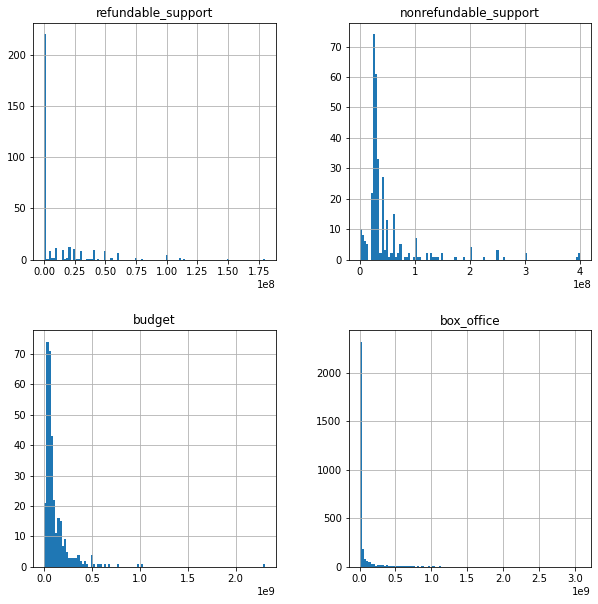

In [38]:
df[df[quantitative_columns].notna()][quantitative_columns].hist(bins=100, figsize=(10, 10));

### Добавим новые столбцы

Создадим столбец с информацией о годе проката.

In [39]:
df['year_start_date'] = df['show_start_date'].dt.year

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [40]:
df['main_director'] = df.director.apply(lambda x: x.split(',')[0] if type(x) != float else x )

In [41]:
df['main_genre'] = df.genres.apply(lambda x: x.split(',')[0] if type(x) != float else x )

In [42]:
df[['director', 'main_director', 'genres', 'main_genre']].sample(5)

,director,main_director,genres,main_genre
3100,"Джон Клацкевич, Курт Морган",Джон Клацкевич,"документальный, боевик, приключения",документальный
4604,Оливье Мегатон,Оливье Мегатон,"боевик, триллер, драма",боевик
6003,Н.Урвачева,Н.Урвачева,NaN,NaN
4218,Кристофер Нолан,Кристофер Нолан,"фантастика, триллер, драма",фантастика
3097,Хак Ботко,Хак Ботко,комедия,комедия


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [43]:
df['support_ratio'] = (df.nonrefundable_support + df.refundable_support) / df.budget

In [44]:
df[df.support_ratio.notna()].sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,budget_for_replace_ratio,budget_for_replace,year_start_date,main_director,main_genre,support_ratio
1703,Две женщины,111013714,2014-10-02,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,12+,0.0,...,"Министерство культуры, Фонд кино",6.7,драма,"4,731,239.5","106,165,688.0","84,992,905.0",2014,В.Глаголева,драма,0.5
3144,Ура! Каникулы!,111009916,2016-06-09,Художественный,"ООО ""Бармалей - Фильм""",Россия,М.Демченко,"С.Снежкин, Н.Горина",6+,0.0,...,Министерство культуры,7.3,"детский, приключения, семейный","1,975,132.0","79,905,707.0","73,490,606.0",2016,М.Демченко,детский,0.6
4916,СОФИЧКА,111007717,2017-11-21,Художественный,"Некоммерческий фонд поддержки кинематографа ""П...",Россия,К.Коваленко,Н.Янкин,16+,0.0,...,Министерство культуры,6.7,драма,"168,512.0","57,075,505.0","63,490,606.0",2017,К.Коваленко,драма,0.6
4859,Конверт,111007217,2017-11-30,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,В.Марков,К.Буслов,16+,"5,000,000.0",...,Фонд кино,5.6,"триллер, ужасы","7,189,790.0","79,905,707.0","73,490,606.0",2017,В.Марков,триллер,0.5
3322,Все о мужчинах,111012716,2016-08-17,Художественный,"ООО ""Фреш-Фильм"", ООО ""Энджой мувиз""",Россия,"Л.Марголин, С.Андреасян, М.Жерневский","С.Андреасян, Г.Андреасян, А.Ананикян, М.Галуст...",16+,"10,000,000.0",...,Фонд кино,4.9,комедия,"62,260,863.6","45,660,404.0","58,490,606.0",2016,Л.Марголин,комедия,0.6


## Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

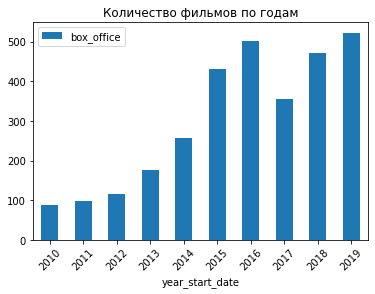

In [45]:
pd.pivot_table(df,
               index='year_start_date',
               values='box_office',
               aggfunc='count').plot(kind='bar', title='Количество фильмов по годам', rot='45');

In [46]:
print(f'Доля фильмов с информацией о прокате составляет {df.box_office.notna().mean():.1%}')

Доля фильмов с информацией о прокате составляет 44.6%


Изучим, как менялась динамика проката по годам.

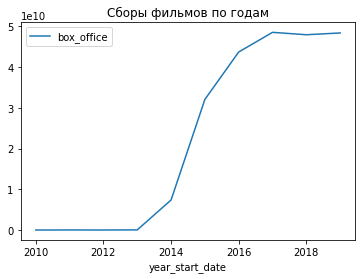

In [47]:
pd.pivot_table(df, index='year_start_date', values='box_office', aggfunc='sum').plot(title='Сборы фильмов по годам');

В 2010 вышло меньше всего фильмов, в а 2017 больше всего.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [48]:
pd.pivot_table(df, index='year_start_date', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year_start_date,,
2010,"26,981.1","1,868.0"
2011,"142,289.7","3,042.5"
2012,"55,733.7","6,692.5"
2013,"169,139.4","3,565.0"
2014,"28,687,154.0","22,490.0"
2015,"74,442,343.1","4,327,265.7"
2016,"87,288,312.8","3,640,802.3"
2017,"136,408,860.3","10,177,833.5"


То что медиана и среднее так сильно различаются говорит о том, что в данных есть выбросы. В нашем случае это означает, что в выборке есть фильмы, сборы которых сильно отличаюся от медианного значения. И так как медиана намного меньше среднего, можно сделать преположение, что в данных много нулевых значений. Гистограмма ниже это подтверждает.

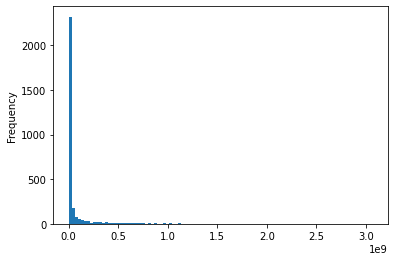

In [49]:
df.box_office.plot(kind='hist', bins=100);

- Определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год?

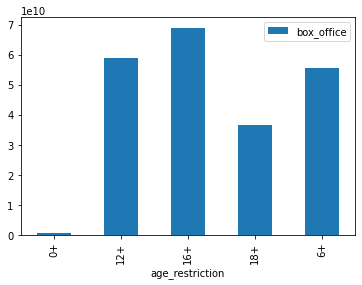

In [50]:
pd.pivot_table(df.query('year_start_date >= 2015'), index='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar');

Фильмы с рейтингом "16+" собрали больше всего денег в прокате, а фильмы с рейтингом "0+" меньше всего.

- Посмотрим на динамику сборов по годам для фильмов с разными возрастными ограничениями.

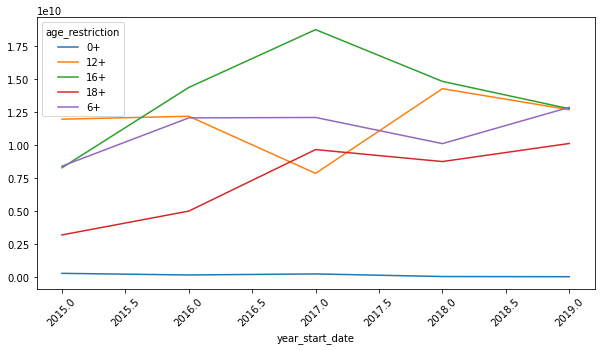

In [51]:
pd.pivot_table(df.query('year_start_date >= 2015'),
               index='year_start_date',
               columns='age_restriction',
               values='box_office',
               aggfunc='sum').plot(rot='45', figsize=(10, 5));

- Видно что фильмы '16+' практически всегда собирали больше денег. Но с 2017 года начался спад сборов для этой категории;
- В это же время начался подъем фильмов '12+'; 
- Фильмы '0+' собирали меньше остальных фильмов с 2015 по 2019 года;
- Фильмы '18+' хоть и обгоняют фильмы '0+', но стабильно ниже фильмов '16+' и '12+'.




### Исследуем фильмы, которые получили государственную поддержку

In [52]:
df_with_support = df[df.financing_source.notna()]
df_with_support.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,budget_for_replace_ratio,budget_for_replace,year_start_date,main_director,main_genre,support_ratio
2321,Зеленая Карета,111009715,2015-06-01,Художественный,"ООО ""Пропеллер продакшн"", ООО ""Революция Фильм...",Россия,"С.Комаров, О.Асадулин","Р.Давлетьяров, А.Алькема, Г.Подземельный, В.Ма...",16+,0.0,...,Министерство культуры,6.6,драма,"2,325,871.1","61,527,394.4","65,440,606.0",2015,С.Комаров,драма,0.7
1733,Призрак_.,111001815,2015-03-02,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,6+,0.0,...,Фонд кино,7.0,"триллер, боевик, приключения","352,804,320.4","171,226,515.0","113,490,606.0",2015,А.Войтинский,триллер,0.5
1829,Снежная Королева 2: Перезаморозка,114000214,2014-11-13,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",0+,"30,000,000.0",...,Фонд кино,6.5,"мультфильм, фэнтези, приключения","313,489,846.5","159,811,414.0","108,490,606.0",2014,А.Цицилин,мультфильм,0.3
1908,Батальонъ,111000715,2015-01-29,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,12+,0.0,...,"Министерство культуры, Фонд кино",7.1,"драма, военный, история","451,812,221.7","129,171,125.5","95,069,661.0",2015,Д.Месхиев,драма,0.1
2649,Преображение (2015),111007016,2016-04-08,Художественный,"ООО ""АБС""",Россия,"Т.Воронецкая, Д.Сергин",Е.Белова,16+,0.0,...,Министерство культуры,5.7,ужасы,"56,800.0","59,358,525.2","64,490,606.0",2016,Т.Воронецкая,ужасы,0.7


### Исследуем как источник финансирования влияет на показатели

In [53]:
pd.pivot_table(df_with_support, index='financing_source', values='title', aggfunc='count')

,title
financing_source,
Министерство культуры,163
"Министерство культуры, Фонд кино",22
Фонд кино,144


- Фонд кино и минкульт практически в одинаковом объеме финансируют фильмы.

In [54]:
pd.pivot_table(df_with_support,
               index='financing_source',
               values=['refundable_support', 'nonrefundable_support'],
               aggfunc=['sum'])

sum                   
                                 nonrefundable_support refundable_support
financing_source                                                         
Министерство культуры                  4,806,661,000.0                0.0
Министерство культуры, Фонд кино         859,931,354.0      325,500,000.0
Фонд кино                             10,145,095,958.0    3,508,500,000.0

- Оба фонда выделяют больше невозвратных средств, причем Министерство культуры выделяет только невозвратные.

In [55]:
pd.pivot_table(df_with_support, index='financing_source', values='support_ratio', aggfunc='mean')

,support_ratio
financing_source,
Министерство культуры,inf
"Министерство культуры, Фонд кино",inf
Фонд кино,inf


- Доля финансируемых средств составляет половину всего бюджета, причем не важен источник финансирования.

In [56]:
pd.pivot_table(df_with_support[df_with_support.ratings.notna()],
               index='financing_source',
               values='ratings', aggfunc='median')

,ratings
financing_source,
Министерство культуры,6.2
"Министерство культуры, Фонд кино",6.6
Фонд кино,6.0


- Медиана оценки финансируемых фильмов составляет около 6.

### Исследуем как жанр влияет на показатели

In [57]:
pivot_by_genre = pd.pivot_table(df_with_support,
                                index='main_genre',
                                values=['box_office', 'budget', 'ratings'],
                                aggfunc={'box_office':'sum',
                                         'budget':'sum',
                                         'ratings':'median'})

- Посмотрим распределние собранных средств в зависимости от жанра.

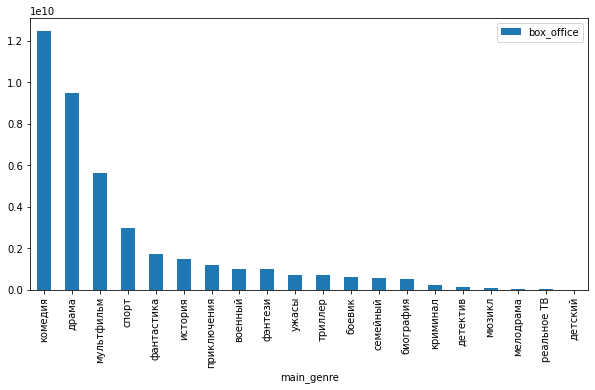

In [58]:
pivot_by_genre.sort_values(by='box_office', ascending=False).plot(kind='bar', y='box_office', figsize=(10, 5));

Больше всего собирают комедии, драмы и мультфильмы.

- Посмотрим у каких фильмов самый большой бюджет.

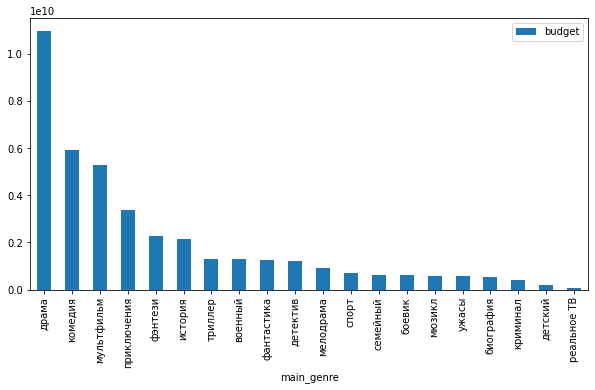

In [59]:
pivot_by_genre.sort_values(by='budget', ascending=False).plot(kind='bar', y='budget', figsize=(10, 5));

На драмы выделяют больше всего денег.

- Посмотрим как зависит рейтинг от жанра.

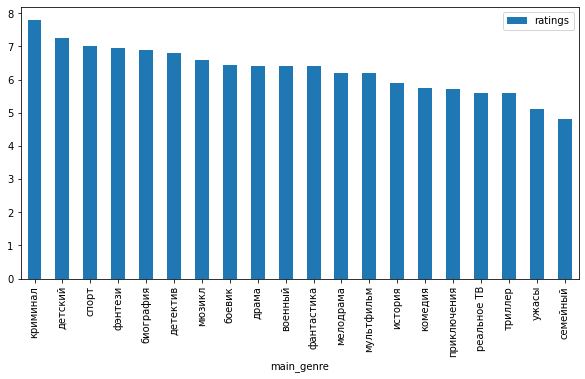

In [60]:
pivot_by_genre.sort_values(by='ratings', ascending=False).plot(kind='bar', y='ratings', figsize=(10, 5));

Криминальные фильмы оценивают выше других.

### Исследуем фильмы, которыe окупились в прокате

- Посмотрим сколько фильмов окупилось.

In [61]:
len(df_with_support.query('box_office >= budget'))

83

In [62]:
payback_films = pd.pivot_table(df_with_support.
                                  query('box_office >= budget'),
                                  index='main_genre',
                                  values=['title', 'box_office', 'ratings'],
                                  aggfunc={'title':'count', 'box_office':'median', 'ratings':'median'})

- Посмотри, какие жанры чаще всего окупаются.

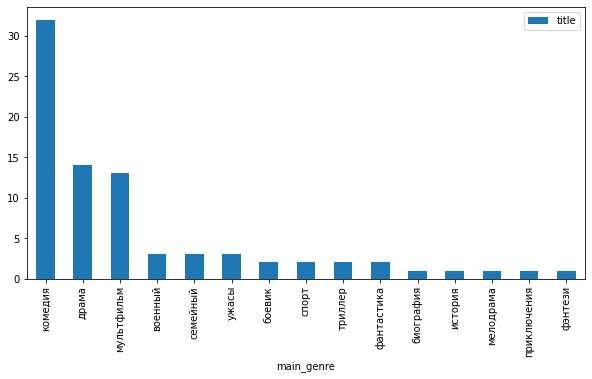

In [63]:
payback_films.sort_values(by='title', ascending=False).plot(kind='bar', y='title', figsize=(10, 5));

Чаще всего окупаются комедии, дальше располагаются драмы, за ними мультфильмы.

- Посмотрим, как рейтинг зависит от жанра.

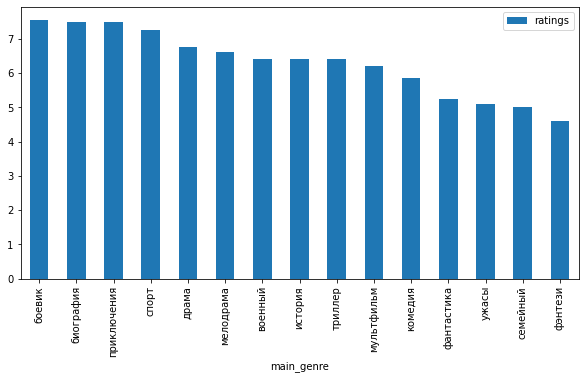

In [64]:
payback_films.sort_values(by='ratings', ascending=False).plot(kind='bar', y='ratings', figsize=(10, 5));

Боевики, биографию, спорт и приключения оценивают выше других жанров.

- Посмотрим, какие жанры собирают больше всего денег в прокате.

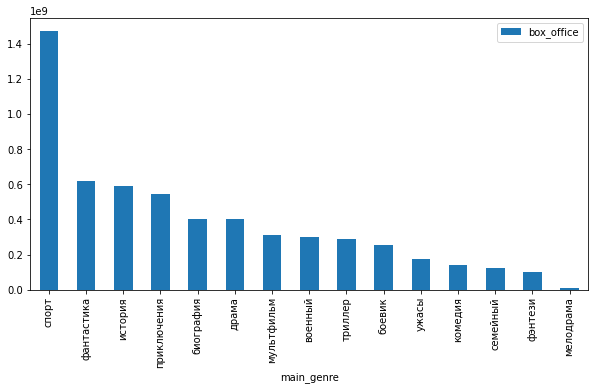

In [65]:
payback_films.sort_values(by='box_office', ascending=False).plot(kind='bar', y='box_office', figsize=(10, 5));

Спортивные фильмы собирают больше остальных.

## Общий вывод

В ходе исследования мы изучили рынок российского кинопроката и посторались выявить текущие тренды. Особое внимание было уделено фильмам, получившим государственную поддержку.

Вот, что удалось выяснить:
1. С каждым годом количество фильмов, которые выходят в кинопрокат растет за исключением 2017 года;


2. До 2013 года динамика роста сборов была не такая внушительная - всего 29 млн. рублей за 2013 год. Но уже в 2014 году сборы составили 7 млрд., а в 2015 уже 32 млрд. рублей, что очень впечатляет. После 2014 года рост значительно замедлился;


3. Больше всего собирают фильмы с рейтингом '16+' в период с 2014 по 2019 года такие фильмы собрали почти 67 млрд. рублей. Меньше всего собрали фильмы с рейтингом '0+' - всего 703 млн. рублей за аналогичный период;


4. Министерство культуры и Фонд кино профинансировали 329 фильмов в период с 2010 по 2019 года, причем только 71 фильм окупился в прокате. И для таких фильмов объем финансируемых средств составляет половину бюджета. Зрители не очень хорошо принимают финансируемые фильмы - серединная оценка таких кинокартин составила около 6 баллов из 10;


5. А вот выделяют больше всего денег на драмы (11 млрд. рублей), комедии и пульт (по 6 млрд. рублей);


6. Среди финансируемых фильмов чаще всего окупаются комедии - таких фильмов 27, а хуже всего биографии, приключения и фэнтези, таких по одному фильму;


7. Зато больше остальных окупившихся фильмов собирают спортивные фильмы - почти 1.5 млрд. рублей.
